# Multiple Linear Regression

Basic Equation : y = b0 + b1x1 + b2x2 + b3x3 + ...... +bnxn

where, y = Dependent variable 
       x1,x2,x3,.....,xn = Independent variable
       b0 = Constant
       b1,b2,b3,.....,bn = Coefficient
     
Five methods to build a Multiple Linear Regression Model:
* All-in
* Backward Elimination
* Forward Selection
* Bidirectional Elimination
* Score Comparison

While building a model with Scikit learn we do not need to use these methods because LinearRegression class has in-built feature for choosing the right method. 

## Importing the libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
dataset = pd.read_csv('50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
X = dataset.drop(['Profit'], axis=1)
y = dataset['Profit']

In [4]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [5]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

## Encoding Categorical Data

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

one_hot = OneHotEncoder()
cat_feature = ['State']
cat_transformer = ColumnTransformer(transformers=[
    ('one_hot',one_hot,cat_feature)],remainder='passthrough')

X = cat_transformer.fit_transform(X)

In [7]:
X

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,
        1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.4437241e+05,
        1.1867185e+05, 3.8319962e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.4210734e+05,
        9.1391770e+04, 3.6616842e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.3187690e+05,
        9.9814710e+04, 3.6286136e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.3461546e+05,
        1.4719887e+05, 1.2771682e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.3029813e+05,
        1.4553006e+05, 3.2387668e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.2054252e+05,
        1.4871895e+05, 3.1161329e+05],
       [1.0000000e+00, 0.0000000e+00,

## Splitting the dataset into the Training and Test set

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state = 9)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40, 6), (10, 6), (40,), (10,))

## Training the Multiple Linear Regression model on the Training set

In [9]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

## Predicting the Test set results

In [10]:
y_preds = regressor.predict(X_test)
y_preds

array([119819.55288789,  86354.20207815, 183301.32209453, 152445.18324334,
        64875.52023603, 162565.6584855 , 148066.57136289, 115726.78239289,
        98775.28101687, 102274.57539609])

## Visualising the Training set results

ValueError: x and y must be the same size

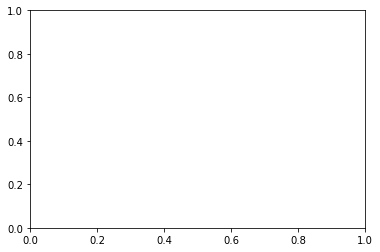

In [11]:
plt.scatter(X_train,y_train, color = 'red')
plt.plot(X_train,regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Comparing predicted labels with actual labels

In [11]:
Compare = pd.DataFrame(columns=['Actual','Predicted'])
Compare['Actual'] = y_test
Compare['Predicted'] = y_preds
Compare

,Actual,Predicted
21,111313.02,119819.552888
37,89949.14,86354.202078
2,191050.39,183301.322095
14,132602.65,152445.183243
44,65200.33,64875.520236
7,155752.60,162565.658485
15,129917.04,148066.571363
20,118474.03,115726.782393
32,97427.84,98775.281017
25,107404.34,102274.575396


## Getting the final linear regression equation with the values of the coefficients

In [12]:
coefficient = regressor.coef_
intercept = regressor.intercept_

In [13]:
coefficient,intercept

(array([-1.29527814e+03,  5.67807340e+02,  7.27470804e+02,  8.15623658e-01,
         7.52203964e-03,  2.60919967e-02]),
 46178.341619477804)

### Therefore, the equation of our simple linear regression model is:

$$\textrm{Profit} = -1300 \times \textrm{Dummy State 1} + 568 \times \textrm{Dummy State 2} + 727 \times \textrm{Dummy State 3} + 0.816 \times \textrm{R&D Spend} + 0.000752 \times \textrm{Administration} + 0.0261 \times \textrm{Marketing Spend} + 46178.34$$